## Lab on IMH and RWM

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.integrate as spi
import metropolis_code_student

# Apply Seaborn style
sns.set_theme(style="whitegrid")


In [3]:
# general useful function that you may use

def cummean(x,axjj=0):
    """
    Compute the cumulative mean of the input array x
    """
    lenx = len(x)
    return np.cumsum(x,axis=axjj) / (np.arange(len(x)) + 1)   

def next_pow_two(n):
    i = 1
    while i < n:
        i = i << 1
    return i

def autocorrelation_fft(x):
    """
    Compute the autocorrelation of the input array x using Fourier Transform
    """
    xp = np.fft.ifftshift((x - np.average(x))/np.std(x))
    n, = xp.shape
    xp = np.r_[xp[:n//2], np.zeros_like(xp), xp[n//2:]]
    f = np.fft.fft(xp)
    p = np.absolute(f)**2
    pi = np.fft.ifft(p)
    return np.abs(np.real(pi)[:n//2]/(np.arange(n//2)[::-1]+n//2))


def cumvar(x):
    """
    Compute the estimate variance of samples of a Markov chain in x
    """
    return 1.96*np.sum(autocorrelation_fft(x))/np.sqrt(1+np.arange(len(x)))



0.33249428003665776


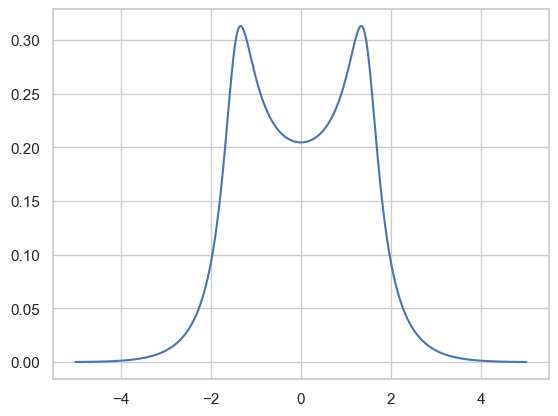

In [4]:

def potential_function(x):
    return 0.2 * x**2 + 0.5*np.log(1+(x**2-2)**2)


x_list = np.linspace(-5, 5, 1000)
y = np.exp(-potential_function(x_list))
normalizing_const = spi.quad(lambda x: np.exp(-potential_function(x)), -5, 5)[0]
y = y/normalizing_const  # normalize
plt.plot(x_list, y)    


test_fun = lambda x: (np.cos(x+1/2))

test_fun_inte = lambda x: test_fun(x)*np.exp(-potential_function(x))/normalizing_const

int_test_fun = spi.quad(test_fun_inte, -5, 5)[0]
print(int_test_fun)



c:\Users\sabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


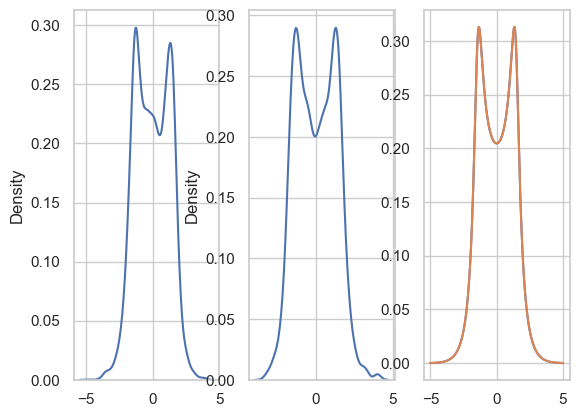

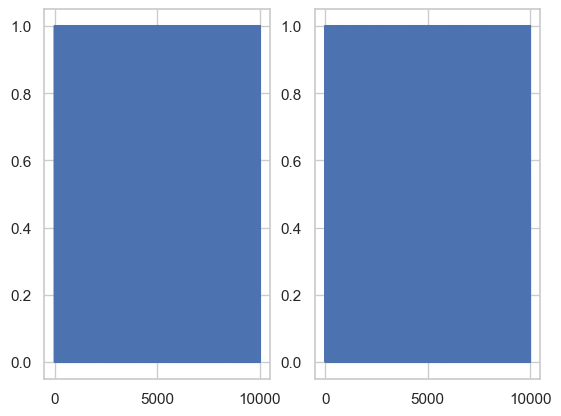

In [5]:
n_samples = 10000
st_proposal_rwm = 2
st_proposal_ihm = 1.
x0 = np.zeros(1)

samples, acc_rwm = metropolis_code_student.random_walk_metropolis(n_samples, st_proposal_rwm, x0)
samples_ihm, acc_ihm  = metropolis_code_student.independance_metropolis(n_samples, st_proposal_ihm, x0)

#print(samples)
fig, ax = plt.subplots(1,3)
sns.kdeplot(samples[:,0], label='RWM', ax=ax[0])
sns.kdeplot(samples_ihm[:,0], label='IH', ax=ax[1])
ax[2] = plt.plot(x_list, y)
plt.plot(x_list, y)

plt.show()


fig, ax = plt.subplots(1,2)
ax[0].plot(acc_rwm)
ax[1].plot(acc_ihm)

plt.show()



[0.93772066 0.93772066 0.93772066 ... 0.34660071 0.34659303 0.34662762]


C:\Users\sabri\AppData\Local\Temp\ipykernel_28700\2266926478.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='Index', y='Cumulative Mean', data=data_rwm, ax=axi[0], label='RWM', ci='sd')
c:\Users\sabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sabri\AppData\Local\Temp\ipykernel_28700\2266926478.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='Index', y='Cumulative Mean', data

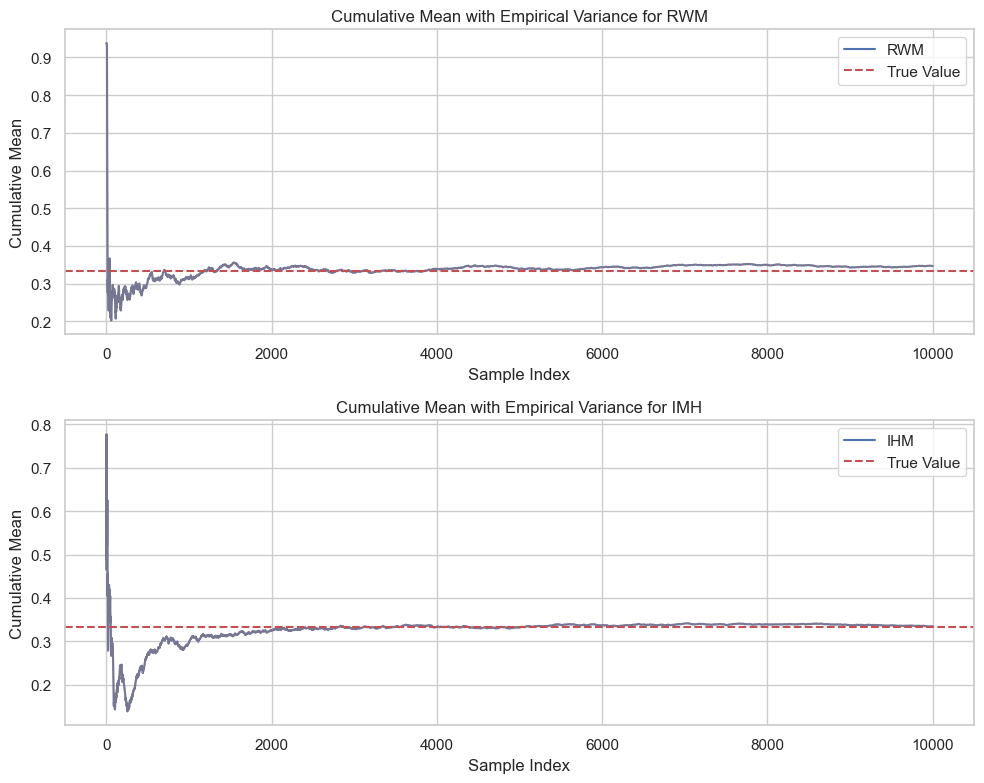

C:\Users\sabri\AppData\Local\Temp\ipykernel_28700\2266926478.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='Index', y='Cumulative Mean', data=data_rwm, ax=axi[0], label='RWM', ci='sd')
c:\Users\sabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sabri\AppData\Local\Temp\ipykernel_28700\2266926478.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='Index', y='Cumulative Mean', data

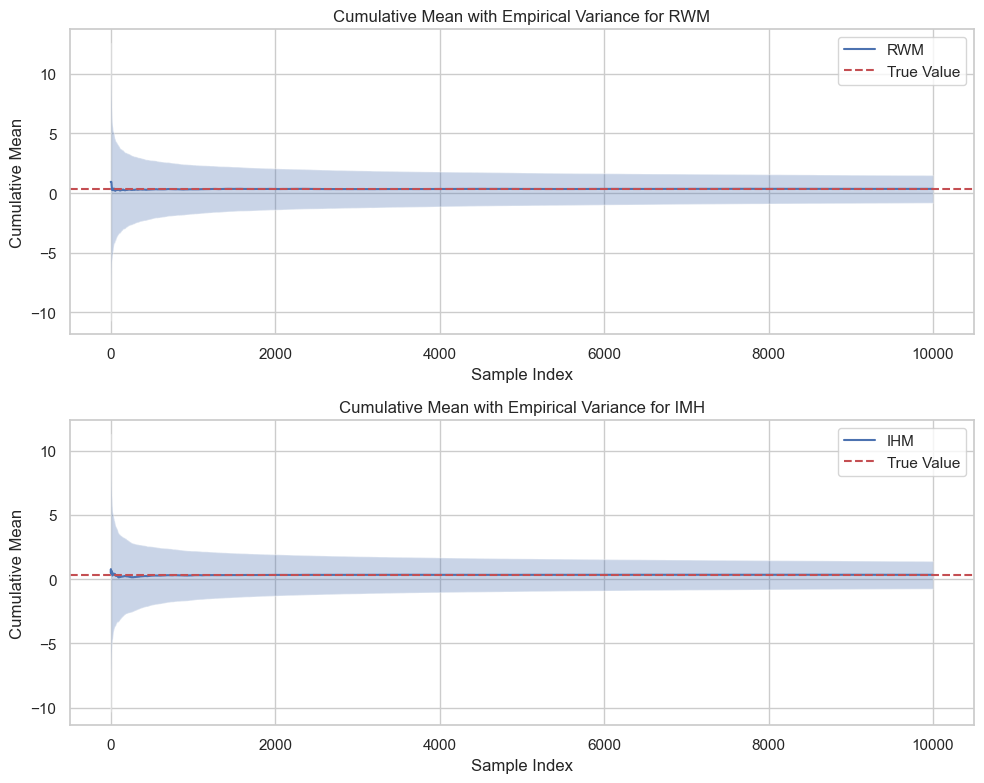

In [6]:

print(np.cumsum(test_fun(samples))/np.arange(1, n_samples+1))
estimator_rwm_list = cummean(test_fun(samples).flatten())
estimator_ihm_list = cummean(test_fun(samples_ihm).flatten())
var_est_rwm = cumvar(test_fun(samples).flatten()) 
var_est_ihm = cumvar(test_fun(samples_ihm).flatten())


data_rwm = pd.DataFrame({
    'Index': range(len(estimator_rwm_list)),
    'Cumulative Mean': estimator_rwm_list,
    'Variance': np.sqrt(var_est_rwm)
})

data_ihm = pd.DataFrame({
    'Index': range(len(estimator_ihm_list)),
    'Cumulative Mean': estimator_ihm_list,
    'Variance': np.sqrt(var_est_ihm)
})

# Plot the cumulative mean
fig, axi = plt.subplots(2, figsize=(10, 8))

sns.lineplot(x='Index', y='Cumulative Mean', data=data_rwm, ax=axi[0], label='RWM', ci='sd')
sns.lineplot(x='Index', y='Cumulative Mean', data=data_ihm, ax=axi[1], label='IHM', ci='sd')

ax = axi[0]
ax.plot(data_rwm['Index'], data_rwm['Cumulative Mean'], alpha=0.3)
ax.axhline(y=int_test_fun, color='r', linestyle='--', label='True Value')
ax.set_xlabel('Sample Index')
ax.set_ylabel('Cumulative Mean')
ax.set_title('Cumulative Mean with Empirical Variance for RWM')
ax.legend()

ax = axi[1]
ax.plot(data_ihm['Index'], data_ihm['Cumulative Mean'], alpha=0.3)
ax.axhline(y=int_test_fun, color='r', linestyle='--', label='True Value')
ax.set_xlabel('Sample Index')
ax.set_ylabel('Cumulative Mean')
ax.set_title('Cumulative Mean with Empirical Variance for IMH')
ax.legend()

plt.tight_layout()
plt.show()

# Plot the cumulative mean with empirical variance
fig, axi = plt.subplots(2, figsize=(10, 8))

sns.lineplot(x='Index', y='Cumulative Mean', data=data_rwm, ax=axi[0], label='RWM', ci='sd')
sns.lineplot(x='Index', y='Cumulative Mean', data=data_ihm, ax=axi[1], label='IHM', ci='sd')

ax = axi[0]
ax.fill_between(data_rwm['Index'], data_rwm['Cumulative Mean'] - data_rwm['Variance'], data_rwm['Cumulative Mean'] + data_rwm['Variance'], alpha=0.3)
ax.axhline(y=int_test_fun, color='r', linestyle='--', label='True Value')
ax.set_xlabel('Sample Index')
ax.set_ylabel('Cumulative Mean')
ax.set_title('Cumulative Mean with Empirical Variance for RWM')
ax.legend()

ax = axi[1]
ax.fill_between(data_ihm['Index'], data_ihm['Cumulative Mean'] - data_ihm['Variance'], data_ihm['Cumulative Mean'] + data_ihm['Variance'], alpha=0.3)
ax.axhline(y=int_test_fun, color='r', linestyle='--', label='True Value')
ax.set_xlabel('Sample Index')
ax.set_ylabel('Cumulative Mean')
ax.set_title('Cumulative Mean with Empirical Variance for IMH')
ax.legend()

plt.tight_layout()
plt.show()

c:\Users\sabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


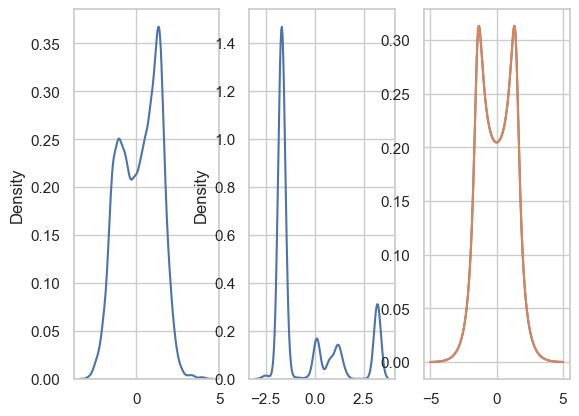

0.0


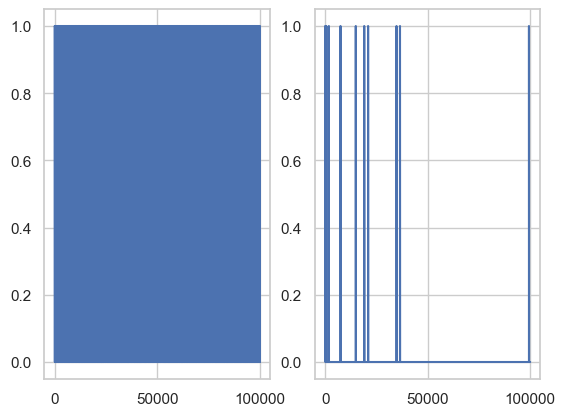

In [7]:
n_samples = 100000
st_proposal_rwm = 0.1
st_proposal_ihm = 1.25
x0 = np.zeros(40)

samples, acc_rwm = metropolis_code_student.random_walk_metropolis(n_samples, st_proposal_rwm, x0)
samples_ihm, acc_ihm  = metropolis_code_student.independance_metropolis(n_samples, st_proposal_ihm, x0)

#print(samples)
fig, ax = plt.subplots(1,3)
sns.kdeplot(samples[:,0], label='RWM', ax=ax[0])
sns.kdeplot(samples_ihm[:,0], label='IH', ax=ax[1])
ax[2] = plt.plot(x_list, y)
plt.plot(x_list, y)

plt.show()

fig, ax = plt.subplots(1,2)
ax[0].plot(acc_rwm)
ax[1].plot(acc_ihm)
print(acc_ihm[-1])

plt.show()


